In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('C:/Users/LiYibo/Desktop/2022校赛赛题/B.陕西工业增速预测/stastic_csv/2015-2022月度数据',sep='t')

#### 上方cell中引号内指定路径时注意斜杠"/"和"\"，若使用"\”会与转义字符冲突，导致报错

In [ ]:
print(df.head())    # 查看前五行数据，可用于判断数据是否成功加载，了解每列的列名，内容

In [4]:
type(df)    # 获取信息

pandas.core.frame.DataFrame

In [5]:
df.shape   # 获取数据尺寸

(1704, 6)

In [6]:
df.info()   # 获取详细信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [7]:
df.columns    # 获取列属性

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

#### 获取行与列的子集

In [8]:
#  获取列子集

In [9]:
country_df=df['country']    # 获取原数据country列
print(country_df.head(10))  # 打印country列前十行，使用head(-n)时则获取  除最后n行的所有数据

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
5    Afghanistan
6    Afghanistan
7    Afghanistan
8    Afghanistan
9    Afghanistan
Name: country, dtype: object


In [10]:
print(country_df.tail(10))   # 获取数据country_df的最后10行

1694    Zimbabwe
1695    Zimbabwe
1696    Zimbabwe
1697    Zimbabwe
1698    Zimbabwe
1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [11]:
subset=df[ ['country','continent','year'] ]   # 使用列表方式获取多个行的数据

In [12]:
print(subset.head())

       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


In [13]:
print(subset.tail())

       country continent  year
1699  Zimbabwe    Africa  1987
1700  Zimbabwe    Africa  1992
1701  Zimbabwe    Africa  1997
1702  Zimbabwe    Africa  2002
1703  Zimbabwe    Africa  2007


In [14]:
# 获取行子集

In [15]:
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [16]:
# 最左侧一列数字是行索引标签，下面基于 loc[] 方法，基于行索引标签获取行子集
# 行索引标签是行的属性

In [17]:
print(df.loc[0])   # 获取行索引标签为0的行（即第一行）

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object


In [18]:
print(df.loc[1])   # 获取行索引吧标签为1的行（即第2行）

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object


In [19]:
# 注意，如以上注释所示，loc[]方法传入参数是行索引标签，故诸如loc[-1]会报错，可事先由索引标签计算出行数再传参

In [20]:
print(df.iloc[1])   # 使用iloc[]方法，用行号获取第2行

#与loc[]不同，iloc[]可以传入-1获取最后一行数据

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object


In [21]:
print(df.iloc[ [9,99,999] ])    #iloc[]支持传入列表获取多行

         country continent  year  lifeExp       pop    gdpPercap
9    Afghanistan      Asia  1997   41.763  22227415   635.341351
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [22]:
print(df.tail(1))   # 返回最后一行

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [23]:
# 注意tail(),loc()返回结果形式的不同(series和Dataframe)

In [24]:
print("loc:   {}\ntail:  {}\niloc:  {}".format( type(df.loc[0])  , type(df.tail(1)) , type(df.iloc[-1]) ))

loc:   <class 'pandas.core.series.Series'>
tail:  <class 'pandas.core.frame.DataFrame'>
iloc:  <class 'pandas.core.series.Series'>


In [25]:
# 由此，综合后可以获取整个数据的子集
# df.loc[ [row_num] , [column_name] ]
# df.iloc[ [row_num] , [column_num ]

In [26]:
subset = df.loc[ : , ['year','pop']]   #获取指定列的所有行（ iloc[]同理 ）
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [27]:
subset = df.iloc[ : , [2,4,-1]]     #使用 iloc[],传入列号获取子集，且支持-1获取最后一行
print(subset)

      year       pop   gdpPercap
0     1952   8425333  779.445314
1     1957   9240934  820.853030
2     1962  10267083  853.100710
3     1967  11537966  836.197138
4     1972  13079460  739.981106
...    ...       ...         ...
1699  1987   9216418  706.157306
1700  1992  10704340  693.420786
1701  1997  11404948  792.449960
1702  2002  11926563  672.038623
1703  2007  12311143  469.709298

[1704 rows x 3 columns]


#### 注意：iloc传入参数为整数num而非列名str，loc传入列名str而非整数num

In [28]:
# 利用range(),通过范围选取子集
# 此时需要用list()嵌套range()生成列表

In [29]:
subset=df.iloc[ : , list(range(0,5)) ]
print(subset)

          country continent  year  lifeExp       pop
0     Afghanistan      Asia  1952   28.801   8425333
1     Afghanistan      Asia  1957   30.332   9240934
2     Afghanistan      Asia  1962   31.997  10267083
3     Afghanistan      Asia  1967   34.020  11537966
4     Afghanistan      Asia  1972   36.088  13079460
...           ...       ...   ...      ...       ...
1699     Zimbabwe    Africa  1987   62.351   9216418
1700     Zimbabwe    Africa  1992   60.377  10704340
1701     Zimbabwe    Africa  1997   46.809  11404948
1702     Zimbabwe    Africa  2002   39.989  11926563
1703     Zimbabwe    Africa  2007   43.487  12311143

[1704 rows x 5 columns]


In [30]:
# 利用切片选取子集

In [31]:
subset=df.iloc[:,:3]    # 获取前三列
print(subset)

          country continent  year
0     Afghanistan      Asia  1952
1     Afghanistan      Asia  1957
2     Afghanistan      Asia  1962
3     Afghanistan      Asia  1967
4     Afghanistan      Asia  1972
...           ...       ...   ...
1699     Zimbabwe    Africa  1987
1700     Zimbabwe    Africa  1992
1701     Zimbabwe    Africa  1997
1702     Zimbabwe    Africa  2002
1703     Zimbabwe    Africa  2007

[1704 rows x 3 columns]


In [32]:
subset=df.iloc[:,3:6]    # 获取第3，4，5列
print(subset)

      lifeExp       pop   gdpPercap
0      28.801   8425333  779.445314
1      30.332   9240934  820.853030
2      31.997  10267083  853.100710
3      34.020  11537966  836.197138
4      36.088  13079460  739.981106
...       ...       ...         ...
1699   62.351   9216418  706.157306
1700   60.377  10704340  693.420786
1701   46.809  11404948  792.449960
1702   39.989  11926563  672.038623
1703   43.487  12311143  469.709298

[1704 rows x 3 columns]


In [33]:
subset=df.iloc[:,0:6:2]    # 获取第0,2,4列
print(subset)

          country  year       pop
0     Afghanistan  1952   8425333
1     Afghanistan  1957   9240934
2     Afghanistan  1962  10267083
3     Afghanistan  1967  11537966
4     Afghanistan  1972  13079460
...           ...   ...       ...
1699     Zimbabwe  1987   9216418
1700     Zimbabwe  1992  10704340
1701     Zimbabwe  1997  11404948
1702     Zimbabwe  2002  11926563
1703     Zimbabwe  2007  12311143

[1704 rows x 3 columns]


In [34]:
# 同时获取行和列的子集

In [35]:
# 考虑 loc[] 和 iloc[] 的区别
print(df.loc[5,'country'])
print('----------------')
print(df.iloc[5,0])

Afghanistan
----------------
Afghanistan


In [36]:
# 获取多行和多列
print(df.loc[ [0,99,999] , ['country','lifeExp','gdpPercap'] ])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


#### 分组和聚合运算

##### 对数据按照某规则进行分割

In [37]:
#使用DataFrame的groupby()方法

In [38]:
grouped_year_df=df.groupby('year')

In [39]:
print(grouped_year_df)  # 选择输出此DataFrame,只会返回其内存位置
print("------------------------------")
print(type(grouped_year_df))

------------------------------
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [40]:
# 以上已经将数据分组，现在选取需要的列进行相关计算
# 例如计算’lifeExp‘的相关数据

In [41]:
grouped_year_df_lifeExp=grouped_year_df['lifeExp']

print(grouped_year_df_lifeExp)
print('-----------------------------------------------------------------')
print(type(grouped_year_df_lifeExp))

-----------------------------------------------------------------
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [42]:
# 由上方cell的输出显示，grouped_year_df_lifeExp是一个series结构，因为此时只获取了’lifeExp‘这一列数据，其内容是按年分组后的lifeExp

In [43]:
# 下面计算grouped_year_df_lifeExp的相关聚合数值

In [44]:
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
print(mean_lifeExp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [45]:
#上述过程可以整合为:
#print(df.groupby('year')['lifeExp'].mean())

In [46]:
# 更进一步，对多个变量进行分组、聚合,此时需要用列表传入

In [47]:
print(df.groupby(['year','continent'])['lifeExp','gdpPercap'].mean())

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


D:\Anaconda\envs\calculate\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [48]:
# 上述语句等价于：
multi_group_var=df. \
    groupby(['year','continent']) \
    ['lifeExp','gdpPercap'].mean()
print(multi_group_var)

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699


D:\Anaconda\envs\calculate\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [49]:
# 平铺DataFrame,使用reset_index方法
flat = multi_group_var.reset_index()
print( flat.head(20) )

    year continent    lifeExp     gdpPercap
0   1952    Africa  39.135500   1252.572466
1   1952  Americas  53.279840   4079.062552
2   1952      Asia  46.314394   5195.484004
3   1952    Europe  64.408500   5661.057435
4   1952   Oceania  69.255000  10298.085650
5   1957    Africa  41.266346   1385.236062
6   1957  Americas  55.960280   4616.043733
7   1957      Asia  49.318544   5787.732940
8   1957    Europe  66.703067   6963.012816
9   1957   Oceania  70.295000  11598.522455
10  1962    Africa  43.319442   1598.078825
11  1962  Americas  58.398760   4901.541870
12  1962      Asia  51.563223   5729.369625
13  1962    Europe  68.539233   8365.486814
14  1962   Oceania  71.085000  12696.452430
15  1967    Africa  45.334538   2050.363801
16  1967  Americas  60.410920   5668.253496
17  1967      Asia  54.663640   5971.173374
18  1967    Europe  69.737600  10143.823757
19  1967   Oceania  71.310000  14495.021790


In [50]:
# 计数
# 使用 nunique方法进行series唯一值计数
# 使用 value_counts方法进行频率计数

In [51]:
unique_num=df.groupby('continent')['country'].nunique()     #统计各continent组中的country唯一值
print(unique_num)

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


#### 基本绘图

In [52]:
global_yearly_life_exp=df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_exp)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


<AxesSubplot:xlabel='year'>

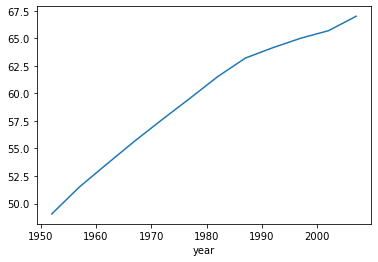

In [53]:
# 绘图
global_yearly_life_exp.plot()

### Chapter 2：   Pandas数据结构

In [54]:
# 创建Series

In [55]:
# 使用python列表创建一个Series
s=pd.Series( ['banana','42'] )

In [56]:
print(s)

0    banana
1        42
dtype: object


In [57]:
# 注意： 上方Series最左边一列的数字是该Series的索引
# 该索引值可通过传入index()指定，如下：

In [58]:
s=pd.Series( ['banana','42'],index=['type','num'] )
print(s)

type    banana
num         42
dtype: object


In [59]:
# 创建DataFrame

In [60]:
#常用字典创建Dataframe

In [61]:
scientist=pd.DataFrame( {
    'Name':['Franklin','Gooset'],
    'Occupation':['Chemist','Statistician'],
    'Born':['1920','1876'],
    'Died':['1958','1937']
     } )


scientist

,Name,Occupation,Born,Died
0,Franklin,Chemist,1920,1958
1,Gooset,Statistician,1876,1937


In [62]:
# 上述输出结果无顺序，可指定、

# 使用 columns 参数指定列顺序，使用 index 指定行顺序

In [63]:
# 由下例可见，Dataframe对象实例化可分三部分，data(以字典传入),index(以列表传入),columns(以列表传入)

In [64]:
scientist=pd.DataFrame(
    data=
    {
    'Name':['Franklin','Gooset'],
    'Occupation':['Chemist','Statistician'],
    'Born':['1920','1876'],
    'Died':['1958','1937']
    },
    index=['Gooset','Franklin'],
    columns=['Name','Born','Died','Occupation']
                       )


scientist

,Name,Born,Died,Occupation
Gooset,Franklin,1920,1958,Chemist
Franklin,Gooset,1876,1937,Statistician


In [65]:
# Series

In [66]:
scientist=pd.DataFrame(
    data=
    {
    'Name':['Franklin','Gooset'],
    'Occupation':['Chemist','Statistician'],
    'Born':['1920','1876'],
    'Died':['1958','1937']
    },
    index=['Gooset','Franklin'],
    columns=['Name','Born','Died','Occupation']
                       )


scientist

,Name,Born,Died,Occupation
Gooset,Franklin,1920,1958,Chemist
Franklin,Gooset,1876,1937,Statistician


In [67]:
# 先使用行索引标签进行选择
first_row = scientist.loc['Gooset']
first_row

Name          Franklin
Born              1920
Died              1958
Occupation     Chemist
Name: Gooset, dtype: object

In [68]:
# Series对象的属性
print(first_row.index)
print(first_row.values)

Index(['Name', 'Born', 'Died', 'Occupation'], dtype='object')
['Franklin' '1920' '1958' 'Chemist']


In [69]:
# Series和 ndarray
# Series 可看作 ndarray 的拓展

In [70]:
age = scientist['Born']
age

Gooset      1920
Franklin    1876
Name: Born, dtype: object

Gooset      1920
Franklin    1876
Name: Born, dtype: object

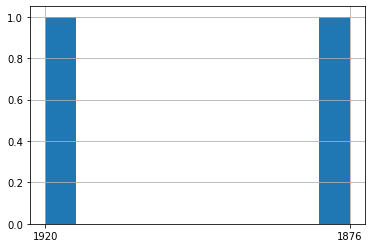

In [71]:
age.mean() # 返回算术平均值
age.hist() # 绘制直方图
age.transpose() # 返回转置矩阵

In [72]:
# 布尔子集：Series

In [73]:
#用于所获取子集的索引不确定时

In [74]:
scientists =pd.read_csv('C:/Users/LiYibo/Desktop/Pandas/pandas_for_everyone-master/data/scientists.csv')

In [75]:
ages=scientists['Age']

In [76]:
ages.describe()  # 一次性获取基本统计量

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [77]:
ages.mean() # 所有年龄平均值

59.125

In [78]:
ages[ ages>ages.mean() ]  #获取大于平均值的年龄

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [79]:
ages>ages.mean()   # 获得布尔向量

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool

In [80]:
# 自动对齐和广播

#Pandas中的广播指不同shape数组之间的运算方式

# 同长度向量运算时，所得向量时两个向量对应元素的和
# 向量与标量运算时，标量与向量每个元素进行运算
# 不同长度向量的运算，取决于向量的类型。对于Series，操作会根据索引进行。结果向量的其余元素被填充为缺失值“NaN”，指“非数值”，对于其他类型，shape必须匹配

# 自动对齐：执行操作时，数据会根据标签自动对齐

In [81]:
# Dataframe

In [83]:
# 使用布尔向量获取DataFrame的子集
scientists [ scientists ['Age'] > scientists['Age'].mean() ]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [84]:
# 操作自动对齐和广播

In [87]:
# DataFrame与标量进行运算时，每个元素分别与标量运算，例如乘2后，字符串将翻倍
scientists * 2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [88]:
# 更改Series 和 DataFrame

In [106]:
# 上例中的Born和Died是字符串形式，可转化为Datatime类型，便于更好操作
obj=['Born','Died']
for item in obj:
    data=pd.to_datetime(scientists[item],format='%Y-%m-%d')
    print('{}{}{}{}'.format(item,'_data:','\n',data))

Born_data:
0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]
Died_data:
0   1958-04-16
1   1937-10-16
2   1910-08-13
3   1934-07-04
4   1964-04-14
5   1858-06-16
6   1954-06-07
7   1855-02-23
Name: Died, dtype: datetime64[ns]


In [108]:
# 数据导出与保存
# 使用to_pickle
# Series 和 DataFrame 使用方式一样
names=scientists['Name']
print(names)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [112]:
# 使用下述语句导出names
'''
names.to_pickle(' 路径/xxx.pickle')        #保存为.pickle格式文件
names.to_csv(' 路径/xxx.csv')              #保存为逗号分隔值.csv文件
names.to_csv(' 路径/xxx.tsv',sep='\t')     #保存为逗号分隔值.csv文件


### 以上方法保存的数据第一列是行号，可使用index参数控制是否保留该列 ###
例：
names.to_csv('路径/xxx.csv'，index=False)         #保存为逗号分隔值.csv文件，不保留第一列的行号
'''
# 如此保存的.pickle是二进制数据，使用文本编辑器打开后将是乱码，故用来保存中间数据以节省空间，但若不使用python将无法读取该数据

"\nnames.to_pickle(' 路径/xxx.pickle')        #保存为.pickle格式文件\nnames.to_csv(' 路径/xxx.csv')              #保存为逗号分隔值.csv文件\nnames.to_csv(' 路径/xxx.tsv',sep='\t')     #保存为逗号分隔值.csv文件\n\n\n### 以上方法保存的数据第一列是行号，可使用index参数控制是否保留该列 ###\n例：\nnames.to_csv('路径/xxx.csv'，index=False)         #保存为逗号分隔值.csv文件，不保留第一列的行号\n"